<a href="https://colab.research.google.com/github/theprofessorllc/ML-Programming-Tutorials/blob/main/Airbnb_New_York_Geospatial_Data_Visualization_Using_Folium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Folium

**Note: Open the Notebook in Colaboratory to view the interactive Folium maps.**

In [ ]:
# Import folium library
# If not available already, install via: !pip install folium
import folium

## Display a Map of New York
The folium.Map() function takes an input location (longitude and latitue) to display relevant map. If no location is given, folium display the world map

This method provides the following built-in options for the tiles parameter. 
* “OpenStreetMap”
* “Mapbox Bright” (Limited levels of zoom for free tiles)
* “Mapbox Control Room” (Limited levels of zoom for free tiles)
* “Stamen” (Terrain, Toner, and Watercolor)
* “Cloudmade” (Must pass API key)
* “Mapbox” (Must pass API key)
* “CartoDB” (positron and dark_matter)

In [ ]:
# Display a New York map (latitude: 40.7128, longitude:-74.0060)
# The -ve sign in longitude signifies West direction
# Default Tileset option: OpenStreetMap
# The width and height have been reduced by 70% to fit the map in the screen.  
newyork_map_osm = folium.Map(location=[40.7128, -74.0060], 
                      width='70%',
                      height='70%',
                      tiles='OpenStreetMap',
                      zoom_start=14,
                      control_scale=True)
newyork_map_osm

In [ ]:
# Default Tileset option: Stamen Terrain
newyork_map_s = folium.Map(location=[40.7128, -74.0060], 
                      width='70%',
                      height='70%',
                      tiles='Stamen Terrain',
                      zoom_start=14,
                      control_scale=True)
newyork_map_s

In [ ]:
# Default Tileset option: CartoDB positron
newyork_map_cdb = folium.Map(location=[40.7128, -74.0060], 
                      width='70%',
                      height='70%',
                      tiles='CartoDB positron',
                      zoom_start=14,
                      control_scale=True)
newyork_map_cdb

##Adding Markers in the New York Map

In [ ]:
newyork_map = folium.Map(location=[40.7350, -74.0060], 
                      width='70%',
                      height='70%',
                      tiles='OpenStreetMap',
                      zoom_start=11,
                      control_scale=True)
# Give the coordinates of the marker in the location parameter and a popup label
# that shows on screen when is marker is hovered upon.
folium.Marker(
    location=[40.7812, -73.9665],
    popup="Central Park",
).add_to(newyork_map)
folium.Marker(
    location=[40.7813, -73.9740],
    popup="American Museum of Natural History",
).add_to(newyork_map)
folium.Marker(
    location=[40.7127, -74.0134],
    popup="One World Trade Center",
).add_to(newyork_map)
folium.Marker(
    location=[40.7484, -73.9857],
    popup="Empire State Building",
).add_to(newyork_map)
folium.Marker(
    location=[40.6892, -74.0445],
    popup="Statue of Liberty National Monument",
).add_to(newyork_map)
newyork_map

# Visualize Airbnb New York Dataset
Dataset is available here: http://insideairbnb.com/get-the-data.html

In [ ]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import folium plugins
from folium import plugins
from folium.plugins import MarkerCluster

# Filter Warnings during visualization
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the dataset
airbnb_nyc_data = pd.read_csv('/content/drive/MyDrive/Datasets/Airbnb New York/listings.csv')
airbnb_nyc_data.head()

id  ... license
0  2595  ...     NaN
1  3831  ...     NaN
2  5121  ...     NaN
3  5136  ...     NaN
4  5178  ...     NaN

[5 rows x 18 columns]

## Exploratory Data Analysis (EDA)

In [ ]:
# Display dataset shape
airbnb_nyc_data.shape

(36724, 18)

In [ ]:
# Examine the dataset
airbnb_nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36724 entries, 0 to 36723
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36724 non-null  int64  
 1   name                            36711 non-null  object 
 2   host_id                         36724 non-null  int64  
 3   host_name                       36701 non-null  object 
 4   neighbourhood_group             36724 non-null  object 
 5   neighbourhood                   36724 non-null  object 
 6   latitude                        36724 non-null  float64
 7   longitude                       36724 non-null  float64
 8   room_type                       36724 non-null  object 
 9   price                           36724 non-null  int64  
 10  minimum_nights                  36724 non-null  int64  
 11  number_of_reviews               36724 non-null  int64  
 12  last_review                     

In [ ]:
print("Check the number of null values in each column")
airbnb_nyc_data.isnull().sum()

Check the number of null values in each column


id                                    0
name                                 13
host_id                               0
host_name                            23
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        9415
reviews_per_month                  9415
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           36724
dtype: int64

In [ ]:
# Selecting relevant columns data will be used in this visualization
airbnb_nyc_data_filtered = airbnb_nyc_data[['name','neighbourhood_group',
                                            'latitude','longitude','price',
                                            'number_of_reviews']]

In [ ]:
# Replace missing name values
airbnb_nyc_data_filtered['name'].fillna(value="Default Name", inplace=True)

In [ ]:
# Format name to exclude non-alphanumeric characters
airbnb_nyc_data_filtered['name'] = airbnb_nyc_data_filtered['name'].str.replace('\W', '')

In [ ]:
print("Check the number of null values in each column of filtered dataset")
airbnb_nyc_data_filtered.isnull().sum()

Check the number of null values in each column of filtered dataset


name                   0
neighbourhood_group    0
latitude               0
longitude              0
price                  0
number_of_reviews      0
dtype: int64

In [ ]:
# Setting global font size for all visulizations
plt.rcParams['font.size'] = '16'

###Scatter plot

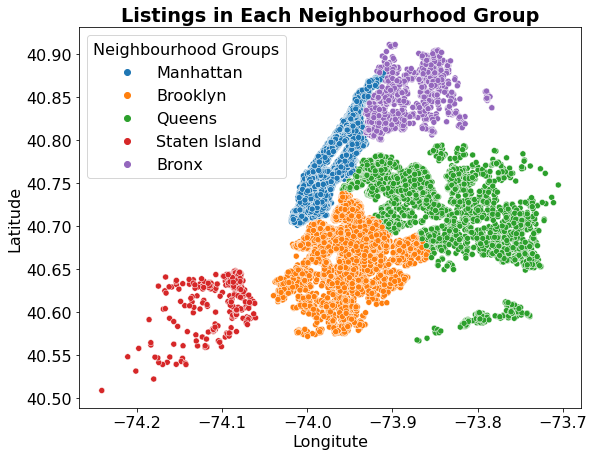

In [ ]:
# Scatter plot of listings in each neighbourhood
plt.figure(figsize=(9, 7))
sns.scatterplot(airbnb_nyc_data_filtered.longitude,
                airbnb_nyc_data_filtered.latitude,
                hue=airbnb_nyc_data_filtered.neighbourhood_group)
plt.xlabel("Longitute")
plt.ylabel("Latitude")
plt.title("Listings in Each Neighbourhood Group", weight='bold')
plt.legend(title="Neighbourhood Groups")

###Folium Maps

In [ ]:
# Plot top 1000 most reviewed listings using folium
most_reviews_nyc = airbnb_nyc_data_filtered.sort_values(by=['number_of_reviews'], 
                                                 ascending=False).head(1000)

print('Most Reviewed Rooms')
latitude = 40.7128
longitude = -74.0060

most_reviews_map=folium.Map([latitude,longitude],
                            width='70%',
                            height='70%',
                            control_scale=True)
# Make clusters of rooms
most_review_rooms_map=plugins.MarkerCluster().add_to(most_reviews_map)

for lat,lon,label in zip(most_reviews_nyc.latitude,
                         most_reviews_nyc.longitude,
                         most_reviews_nyc.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),
                  popup=label).add_to(most_review_rooms_map)
                  
# Add a child map containing the clusters of most reviewed rooms
most_reviews_map.add_child(most_review_rooms_map)
most_reviews_map

Most Reviewed Rooms


In [ ]:
# Plot top 1000 most expensive listings using folium
most_expensive_nyc=airbnb_nyc_data_filtered.sort_values(by=['price'],
                                                        ascending=False).head(1000)

print('Most Expensive Rooms')
latitude=40.80
longitude=-73.80

most_expensive_map=folium.Map([latitude,longitude],
                            width='70%',
                            height='70%',
                            control_scale=True)
# Make clusters of rooms
most_expensive_rooms_map=plugins.MarkerCluster().add_to(most_expensive_map)

for lat,lon,label in zip(most_expensive_nyc.latitude,
                         most_expensive_nyc.longitude,
                         most_expensive_nyc.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),
                  popup=label).add_to(most_expensive_rooms_map)
# Add a child map containing the clusters of most expensive rooms
most_expensive_map.add_child(most_expensive_rooms_map)
most_expensive_map

Most Expensive Rooms
